# BA780 - Assignment 3 - Framingham Heart Study
(https://github.com/FreyaJiang0104/Intro-to-Data-Analytics/blob/main/data/AnalyticsEdge-Datasets/Framingham.csv)



## Dataset Description

**About Dataset**\
\
This dataset contains information from a cardiovascular study conducted in the town of Framingham, Massachusetts. It includes 4240 records and 16 variables on gender, age, education, total cholesterol, and all other related features of the population.

## 1. Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter

In [2]:
url = 'https://raw.githubusercontent.com/FreyaJiang0104/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv'
data = pd.read_csv(url)

## 2. Overview of the Data

In [17]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## 3. Data Preprocessing

Since all columns can be used for analysis, there is no need to drop any columns. We can proceed by addressing the missing values in the data.

In [5]:
# Determine the proportion of missing values in each column relative to all the data in that column
data.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

We can observe that these missing values are random, and the proportion of missing values in several columns does not exceed 5%. Therefore, we can follow the Complete Case Analysis approach and directly drop the rows with missing values.

In [6]:
data.dropna(subset=['education','cigsPerDay','BPMeds','totChol','BMI','heartRate'],inplace=True)

Since the proportion of missing values in the 'glucose' column exceeds 5%, we cannot simply drop them; we need to adopt an imputation method.

The data type for 'glucose' is float, so using the median or the mean for imputation would be appropriate. The choice between them can be determined by examining the data distribution.

**This visualization is not included in the 5!**

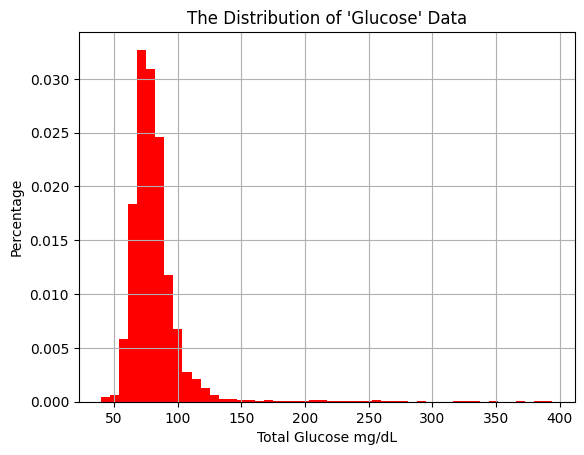

In [12]:
# Visualize the distribution of the 'glucose' column data
fig = plt.figure()
ax = fig.add_subplot(111)
data['glucose'].hist(bins = 50, ax = ax, density = True , color = 'red')
plt.title("The Distribution of 'Glucose' Data")
plt.xlabel('Total Glucose mg/dL')
plt.ylabel('Percentage')
plt.show()

We can see that the data distribution is close to a normal distribution, but there are some unusually large values, so using the median is a more robust choice.

In [19]:
# Fill the null with the median and reset index
data['glucose'].fillna(data['glucose'].median(),inplace=True)
data.reset_index(inplace=True,drop=True)

In [20]:
# Check again whether there are null values in the dataframe
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3989 non-null   int64  
 1   age              3989 non-null   int64  
 2   education        3989 non-null   float64
 3   currentSmoker    3989 non-null   int64  
 4   cigsPerDay       3989 non-null   float64
 5   BPMeds           3989 non-null   float64
 6   prevalentStroke  3989 non-null   int64  
 7   prevalentHyp     3989 non-null   int64  
 8   diabetes         3989 non-null   int64  
 9   totChol          3989 non-null   float64
 10  sysBP            3989 non-null   float64
 11  diaBP            3989 non-null   float64
 12  BMI              3989 non-null   float64
 13  heartRate        3989 non-null   float64
 14  glucose          3989 non-null   float64
 15  TenYearCHD       3989 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 498.8 KB


## 4. Data Visualization

### i. **Heatmap** used to explore the linear relationships among all variables
When exploring relationships between variables, the most intuitive approach is to consider linear relationships, and the corresponding visualization for this is a heatmap.

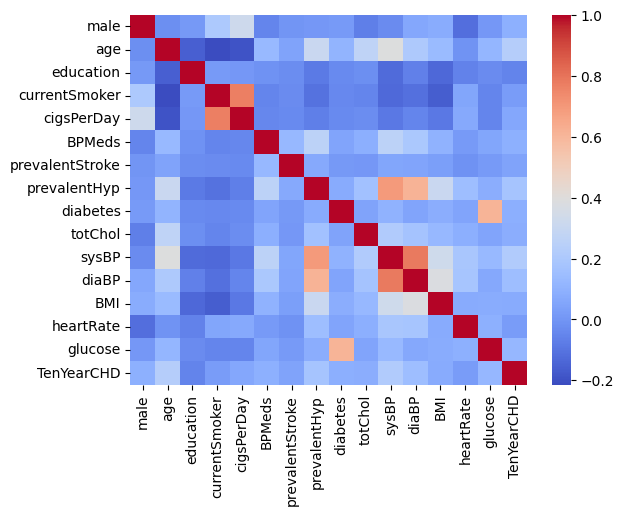

In [22]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.show()

We can observe a strong linear relationship between smoking and the number of cigarettes smoked daily, as well as a relationship between glucose and diabetes. Furthermore, there is a linear correlation between diaBP and sysBP, and prevalentHyp also exhibits strong individual linear relationships with each of them respectively.

However, we can discern that the dataset's creators aimed to find variables related to TenYearCHD. Given that there is no significant linear relationship between TenYearCHD and any variable, I would like to conduct further exploratory analyses. Recognizing the detrimental impact of smoking on the heart, my objective is to investigate the potential link among age, gender, smoking, and the 10-year risk of future coronary heart disease.

### ii. **Stacked Bar Chart** depicting the 10-year coronary heart disease risk among patients in various age groups

In [23]:
# Specify age groups
def age_switch(x):
  for index, value in enumerate(x['age']):
    if value >= 0 and value <= 9:
      x.loc[index, 'AgeGroup'] = '0-9 years'
    elif value >= 10 and value <= 19:
      x.loc[index, 'AgeGroup'] = '10-19 years'
    elif value >= 20 and value <= 39:
      x.loc[index, 'AgeGroup'] = '20-39 years'
    elif value >= 40 and value <= 59:
      x.loc[index, 'AgeGroup'] = '40-59 years'
    else:
      x.loc[index, 'AgeGroup'] = '60 years and over'

age_switch(data)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3989 non-null   int64  
 1   age              3989 non-null   int64  
 2   education        3989 non-null   float64
 3   currentSmoker    3989 non-null   int64  
 4   cigsPerDay       3989 non-null   float64
 5   BPMeds           3989 non-null   float64
 6   prevalentStroke  3989 non-null   int64  
 7   prevalentHyp     3989 non-null   int64  
 8   diabetes         3989 non-null   int64  
 9   totChol          3989 non-null   float64
 10  sysBP            3989 non-null   float64
 11  diaBP            3989 non-null   float64
 12  BMI              3989 non-null   float64
 13  heartRate        3989 non-null   float64
 14  glucose          3989 non-null   float64
 15  TenYearCHD       3989 non-null   int64  
 16  AgeGroup         3989 non-null   object 
dtypes: float64(9),

In [27]:
# Examine the age groups present in the dataset
age_groups = data['AgeGroup'].unique()
age_groups

array(['20-39 years', '40-59 years', '60 years and over'], dtype=object)

In [28]:
graph_1 = data[['AgeGroup','TenYearCHD']]

# Calculate the number of individuals with risk and without risk for each age group
youth1 = graph_1[(graph_1['AgeGroup']=='20-39 years') & (graph_1['TenYearCHD']==1)]['AgeGroup'].count()
youth0 = graph_1[(graph_1['AgeGroup']=='20-39 years') & (graph_1['TenYearCHD']==0)]['AgeGroup'].count()
youth_total = youth1 + youth0

middle_age1 = graph_1[(graph_1['AgeGroup']=='40-59 years') & (graph_1['TenYearCHD']==1)]['AgeGroup'].count()
middle_age0 = graph_1[(graph_1['AgeGroup']=='40-59 years') & (graph_1['TenYearCHD']==0)]['AgeGroup'].count()
middle_age_total = middle_age1 + middle_age0

elder1 = graph_1[(graph_1['AgeGroup']=='60 years and over') & (graph_1['TenYearCHD']==1)]['AgeGroup'].count()
elder0 = graph_1[(graph_1['AgeGroup']=='60 years and over') & (graph_1['TenYearCHD']==0)]['AgeGroup'].count()
elder_total = elder1 + elder0

# Calculate the proportions of individuals with risk and without risk for each age group
one_group = [youth1/youth_total, middle_age1/middle_age_total, elder1/elder_total]
zero_group = [youth0/youth_total, middle_age0/middle_age_total, elder0/elder_total]

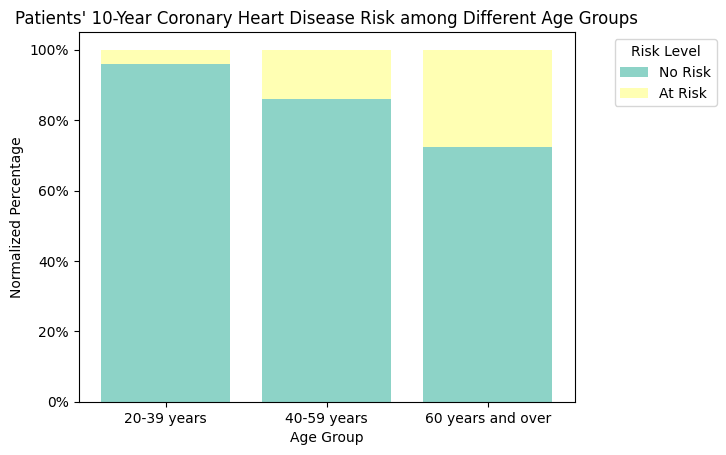

In [30]:
cmap = plt.get_cmap("Set3")
colors = cmap(range(2))

plt.bar(age_groups,zero_group,label='No Risk',color=colors[0])
plt.bar(age_groups,one_group,bottom=zero_group,label='At Risk',color=colors[1])
plt.xticks(age_groups)
plt.xlabel('Age Group')
plt.title("Patients' 10-Year Coronary Heart Disease Risk among Different Age Groups")

def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.ylabel('Normalized Percentage')
plt.legend(title = 'Risk Level',loc='upper right',bbox_to_anchor=(1.3, 1))
plt.show()

We can observe that, despite a higher proportion of individuals without risk across all three age groups, the percentage of individuals at risk steadily rises with age.

To delve further into the analysis, is the number of individuals at risk increasing with age for both men and women?

### iii. **Grouped Bar Chart** displaying the number of individuals at risk for both genders across different age groups

In [31]:
graph_2 = data[data['TenYearCHD']==1][['AgeGroup','male']]

# Calculate the number of males at risk in each age group
male = graph_2[graph_2['male']==1].groupby('AgeGroup').count().reset_index()

# Calculate the number of females at risk in each age group
female = graph_2[graph_2['male']==0].groupby('AgeGroup').count().reset_index()

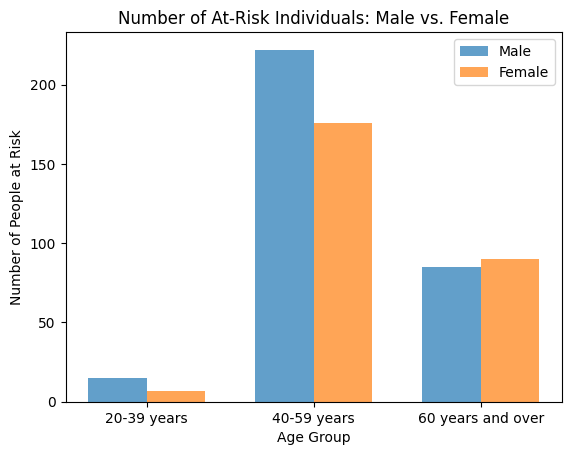

In [32]:
x = np.arange(len(age_groups))
width = 0.35
plt.bar(x-width/2,male['male'],width,label='Male',alpha=0.7)
plt.bar(x+width/2,female['male'],width,label='Female',alpha=0.7)
plt.xticks(x,age_groups)
plt.xlabel('Age Group')
plt.ylabel('Number of People at Risk')
plt.title('Number of At-Risk Individuals: Male vs. Female')
plt.legend()
plt.show()

We can observe that in the young (20-39 years) and middle-aged (40-59 years) groups, the number of males at risk is higher than that of females. Only in the elderly group (60 years and over), the risk of 10-year coronary heart disease is higher for females, although the difference in numbers is small.

Does the presence of a smoking habit correlate with this?

### iv. **Pie Charts** illustrating the proportions of smokers and non-smokers among males and females at risk separately

In [33]:
graph_3 = data[data['TenYearCHD']==1][['male','currentSmoker']]

In [34]:
# Calculate the number of individuals who smoke, broken down by gender
smoker = graph_3[graph_3['currentSmoker']==1].groupby('male').count().reset_index()
total_1 = smoker['currentSmoker'].sum()
female_s = smoker[smoker['male']==0]['currentSmoker'].sum()
male_s = (total_1 - female_s).sum()

# Calculate the number of individuals who don't smoke, broken down by gender
non_smoker = graph_3[graph_3['currentSmoker']==0].groupby('male').count().reset_index()
total_2 = non_smoker['currentSmoker'].sum()
female_n = non_smoker[non_smoker['male']==0]['currentSmoker'].sum()
male_n = (total_2 - female_n).sum()

# Calculate the proportions of smokers and non-smokers for both males and females separately
female_total = female_s + female_n
male_total = male_s + male_n
percentage_1 = [female_s/female_total,female_n/female_total]
percentage_2 = [male_s/male_total,male_n/male_total]

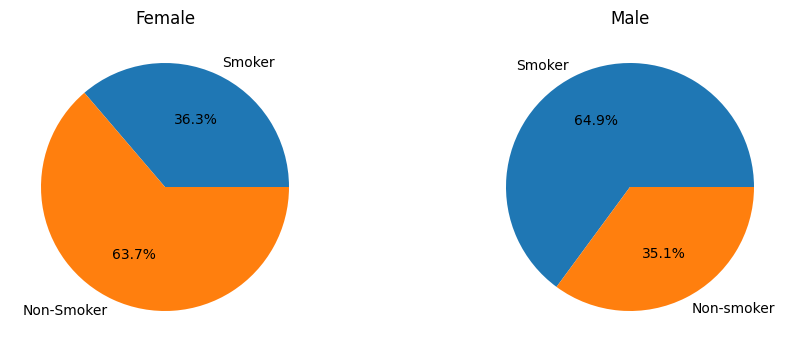

In [35]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].pie(percentage_1,labels=['Smoker','Non-Smoker'],autopct='%1.1f%%')
axs[0].set_title('Female')

axs[1].pie(percentage_2,labels=['Smoker','Non-smoker'],autopct='%1.1f%%')
axs[1].set_title('Male')

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

It is clear that among at-risk females, there are actually more non-smokers. Thus, for females, the association between smoking habits and the risk of 10-year heart disease may not be as strong, with other factors possibly playing a more crucial role. In the case of at-risk males, there is a higher proportion of smokers, though this alone does not establish a direct correlation.

To delve deeper, let's take a look at a scatterplot of smoking counts in relation to gender and age across the entire dataset and try to find if the daily smoking count can better explain the result.

可以看看能不能找到从哪一个数开始，抽烟这件事对心脏病风险有影响（女性影响小也许只是抽得少，男性抽得多）

### v. **Scatterplot** showing the relationship between age and daily smoking count for individuals at risk, stratified by gender

In [36]:
graph_4 = data[(data['TenYearCHD']==1) & (data['currentSmoker']==1)][['age','male','cigsPerDay']]

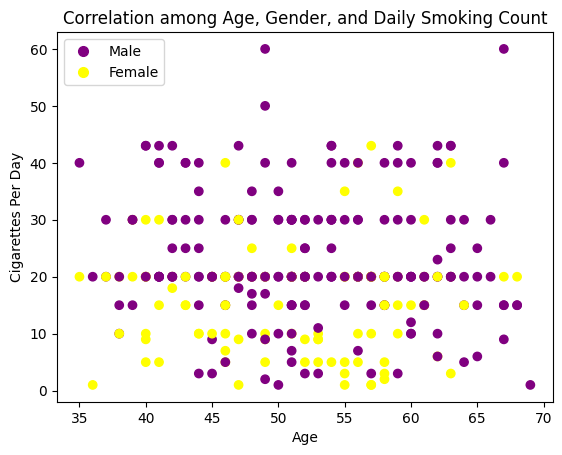

In [38]:
gender = graph_4['male']
color_map = {1:'purple',0:'yellow'}
plt.scatter(graph_4['age'],graph_4['cigsPerDay'],marker='o',c=[color_map[c] for c in gender])
plt.title('Correlation among Age, Gender, and Daily Smoking Count')
plt.xlabel('Age')
plt.ylabel('Cigarettes Per Day')
legend_labels = [plt.Line2D([0], [0], marker='o', color='purple', label='Male', markersize=7, linestyle='None'),
                 plt.Line2D([0], [0], marker='o', color='yellow', label='Female', markersize=7, linestyle='None')]
plt.legend(handles=legend_labels)
plt.show()

This chart indicates that in various age groups, the majority of females who smoke fall within the range of up to 20 cigarettes per day, while males have a broader distribution, mostly ranging from 20 to 45, and even up to 50 or 60 cigarettes per day.

We have just found from the above pie charts that the proportion of non-smokers is higher among at-risk females, while the proportion of smokers is higher among at-risk males.

Considering the information presented in this scatterplot, we might speculate that this difference is related to the quantity of daily cigarettes: females smoke less, so the association with risk appears relatively smaller, and there may be other more significant factors at play; males smoke more, which might explain why the influence of smoking on risk is more pronounced.